# Empirical data: evaluate analyses

We have previously analyzed empirical datasets with CCA and PLS. Here, we illustrate the outcomes.

*Note:* These empirical datasets are not included in this release.

## Setup

In [1]:
import os

import numpy as np
import xarray as xr
import pandas as pd

import pickle

# from gemmr.sample_analysis.macros import *

# NOTE: The figures in this notebook can be generated with matplotlib==3.1.3, 
# but for some reason aren't rendered correctly with newer versions of matplotlib
import matplotlib
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')
hv.renderer('matplotlib').param.set_param(dpi=120)

from my_config import *

import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.simplefilter('ignore', MatplotlibDeprecationWarning)
warnings.filterwarnings(
    'ignore', 'aspect is not supported for Axes with xscale=log, yscale=linear', category=UserWarning
)  # holoviews emits this for log-linear plots

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
matplotlib.__version__

'3.1.3'

In [3]:
clr_cca2 = 'firebrick'
clr_pls2 = 'steelblue'

clr_cca3 = 'coral'
clr_pls3 = 'slateblue'

clr_cca4 = 'goldenrod'
clr_pls4 = 'mediumseagreen'

clr_perm1 = 'dimgrey'
clr_perm2 = 'black'

In [4]:
hcp_fMRI_cca_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc_noz_cca.pickle'), 'rb'))
hcp_fMRI_pls_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc_noz_pls.pickle'), 'rb'))

In [5]:
hcp_dMRI_cca_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_cca.pickle'), 'rb'))
hcp_dMRI_pls_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_pls.pickle'), 'rb'))

In [6]:
ukbb_fMRI_cca_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc_noz_cca.pickle'), 'rb'))
ukbb_fMRI_pls_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc_noz_pls.pickle'), 'rb'))

In [4]:
hcp_fMRI_optiNpcs_cca_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-optiNpcs_noz_cca.pickle'), 'rb'))
hcp_fMRI_optiNpcs_pls_analyses = pickle.load(open(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-optiNpcs_noz_pls.pickle'), 'rb'))

## Plotting functions

In [7]:
class Artist_edgecolor:
    def __init__(self, color):
        self.color = color
    def __call__(self, plot, element):
        artist = plot.handles['artist']
        artist.set_edgecolor(self.color)
        artist.set_linewidth(1.5)
        

def plot_assocs_w_perm(analysis_results, qs=(.025, .975), y_label='y', color='steelblue', 
                       color_perm=None, x_max=None, y_scale=1, cv=None, show_pvalue=False,
                       pvalue_deltay=0):
    
    n = analysis_results['whole_sample'].attrs['n_samples']
    p_tot = len(analysis_results['whole_sample'].x_feature) + len(analysis_results['whole_sample'].y_feature)
    
    ds = analysis_results['whole_sample']
    ds_subsampled = analysis_results['subsampled']
    p_value = analysis_results['p_value']
    
    between_assocs_perm_q = ds.between_assocs_perm.quantile(qs, 'perm')
    
    subsampled_between_assocs_mean = ds_subsampled.between_assocs.mean('rep')
    
    subsampled_between_assocs_q = ds_subsampled.between_assocs.quantile(qs, 'rep')
    subsampled_between_assocs_perm_q = ds_subsampled.between_assocs_perm.stack(it=('rep', 'perm')).quantile(qs, 'it')
    
    if x_max is None:
        x_max = n
    y_max = max(
        float(between_assocs_perm_q.max()),
        float(subsampled_between_assocs_q.max()),
        float(subsampled_between_assocs_perm_q.max())
    )
    
    panel = (
        hv.Area(
            (subsampled_between_assocs_perm_q.n / p_tot, 
             y_scale * subsampled_between_assocs_perm_q.sel(quantile=qs[0]), 
             y_scale * subsampled_between_assocs_perm_q.sel(quantile=qs[-1])),
            vdims=['y', 'y2'],
            label='perm'
        ).opts(color=clr_perm1, linewidth=1.5, hooks=[Artist_edgecolor(color)])
        * hv.Area(
            (subsampled_between_assocs_q.n / p_tot, 
             y_scale * subsampled_between_assocs_q.sel(quantile=qs[0]), 
             y_scale * subsampled_between_assocs_q.sel(quantile=qs[-1])),
            vdims=['y', 'y2'],
            label='data'
        ).opts(color=color, linewidth=0)
        * hv.Curve(
            (subsampled_between_assocs_mean.n / p_tot, y_scale * subsampled_between_assocs_mean),
            vdims='y'
        ).opts(color=color) 
        * hv.ErrorBars(
            (n / p_tot, 
             y_scale * float(between_assocs_perm_q.mean()), 
             y_scale * float(between_assocs_perm_q.sel(quantile=qs[-1]) - between_assocs_perm_q.mean())
            )
        ).opts(color=clr_perm1, hooks=[Artist_edgecolor(color)])
        * hv.Scatter(
            ([n / p_tot], [y_scale * ds.between_assocs])
        ).opts(color=color)
    )

    if show_pvalue:
        panel *= hv.Text(x_max / p_tot, y_scale * y_max + pvalue_deltay, r'$p=%.3f$' % p_value, halign='right', valign='top', fontsize=8)

    if cv is not None:
        
        if color_perm is None:
            color_perm = color
        
        assoc_label, cv_method = cv
        
        between_assocs_cv_perm_q = ds['between_{}_cv_perm'.format(assoc_label)].sel(mode=0, cv=cv_method).quantile(qs, 'perm')
        
        subsampled_between_assocs_cv = ds_subsampled['between_{}_cv'.format(assoc_label)].sel(mode=0, cv=cv_method)
        subsampled_between_assocs_cv_mean = subsampled_between_assocs_cv.mean('rep')
        subsampled_between_assocs_cv_q = subsampled_between_assocs_cv.quantile(qs, 'rep')
        
        subsampled_between_assocs_cv_perm = ds_subsampled['between_{}_cv_perm'.format(assoc_label)].sel(mode=0, cv=cv_method)
        subsampled_between_assocs_cv_perm_q = subsampled_between_assocs_cv_perm.stack(it=('rep', 'perm')).quantile(qs, 'it')
        
        panel *= (
            hv.Area(
                (subsampled_between_assocs_cv_perm_q.n / p_tot, 
                 y_scale * subsampled_between_assocs_cv_perm_q.sel(quantile=qs[0]), 
                 y_scale * subsampled_between_assocs_cv_perm_q.sel(quantile=qs[-1])),
                vdims=['y', 'y2'],
                label='perm'
            ).opts(color=clr_perm1, linewidth=1.5, hooks=[Artist_edgecolor(color_perm)])
            * hv.Area(
                (subsampled_between_assocs_cv_q.n / p_tot, 
                 y_scale * subsampled_between_assocs_cv_q.sel(quantile=qs[0]), 
                 y_scale * subsampled_between_assocs_cv_q.sel(quantile=qs[-1])),
                vdims=['y', 'y2'],
                label='cv'
            ).opts(color=color_perm, linewidth=0)
            * hv.Curve(
                (subsampled_between_assocs_cv_mean.n / p_tot, y_scale * subsampled_between_assocs_cv_mean),
                vdims='y'
            ).opts(color=color_perm) 
            * hv.ErrorBars(
                (n / p_tot, 
                 y_scale * float(between_assocs_cv_perm_q.mean()), 
                 y_scale * float(between_assocs_cv_perm_q.sel(quantile=qs[-1]) - between_assocs_cv_perm_q.mean())
                )
            ).opts(color=clr_perm1, hooks=[Artist_edgecolor(color_perm)])
            * hv.Scatter(
                ([n / p_tot], [y_scale * ds['between_{}_cv'.format(assoc_label)].sel(mode=0, cv=cv_method)])
            ).opts(color=color_perm, marker='^')
        )
    
    return panel.redim(
        x='Samples per feature',
        y=y_label,
        y2=y_label + '2'
    ).opts(
        opts.Area(alpha=.33, show_legend=True),
        opts.ErrorBars(alpha=.33),
        opts.Overlay(padding=.02),
    )

In [8]:
def plot_weight_cossims_n(ds_subsampled, color, qs=(.025, .975)):
    
    p_tot = len(ds_subsampled.x_feature) + len(ds_subsampled.y_feature)

    #xy_weight_sims_mean, xy_weight_sims_q = pairwise_weight_cosine_similarity(ds_subsampled, qs=qs)
    x_cossim_weights_stats = ds_subsampled.x_weights_pairwise_cossim_stats
    y_cossim_weights_stats = ds_subsampled.y_weights_pairwise_cossim_stats
    xy_weight_sims_mean = np.minimum(
        x_cossim_weights_stats.sel(stat='mean'),
        y_cossim_weights_stats.sel(stat='mean'),
    )
    xy_weight_sims_q025 = np.minimum(
        x_cossim_weights_stats.sel(stat='q2.5%'),
        y_cossim_weights_stats.sel(stat='q2.5%'),
    )
    xy_weight_sims_q975 = np.maximum(
        x_cossim_weights_stats.sel(stat='q97.5%'),
        y_cossim_weights_stats.sel(stat='q97.5%'),
    )
    
    vdim = hv.Dimension('weight_cossim', label='Weight stability')
    return (
        hv.Area(
            (ds_subsampled.n / p_tot, xy_weight_sims_q025, xy_weight_sims_q975),
            kdims='Samples per feature',
            vdims=[vdim, 'y2']
        )
        * hv.Curve(
            (xy_weight_sims_mean.n / p_tot, xy_weight_sims_mean),
            kdims='Samples per feature',
            vdims=vdim
        )
    ).opts(
        opts.Area(linewidth=0, color=color, alpha=.33),
        opts.Curve(color=color),
        opts.Overlay(logx=True)
    )

In [9]:
def twinx_scores_spearmansims(plot, element):
    ax = plot.handles['axis']
    ax.spines['top'].set_visible(False)
    try:
        color = plot.style.options['color']
    except:
        print("atist not found")
        color='black'
    twinax = ax.twinx()
    twinax.spines['top'].set_visible(False)
    twinax.set_ylim(-.1, 1)
    twinax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    twinax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontdict=dict(family='Helvetica', size=7, weight='light'))
    twinax.set_ylabel('Score stability', fontdict=dict(family='Helvetica', size=8, weight='normal', color=color))
    plot.handles['axis'] = twinax

    
def plot_score_spearmansims_n(ds, color):
    p_tot = len(ds.x_feature) + len(ds.y_feature)
    panel = (
        hv.Curve(
            (
                ds.n / p_tot,
                np.minimum(
                    np.abs(ds.x_scores_pairwise_spearmansim_stats.sel(stat='mean', mode=0)),
                    np.abs(ds.x_scores_pairwise_spearmansim_stats.sel(stat='mean', mode=0))
                )
            ),
            kdims='Samples per feature'
        ),
    ).opts(
        opts.Curve(initial_hooks=[twinx_scores_spearmansims], color=color)
    )
    return panel

In [10]:
def twinx_pc_bias(plot, element):
    ax = plot.handles['axis']
    ax.spines['top'].set_visible(False)
    try:
        color = plot.style.options['color']
    except:
        print("atist not found")
        color='black'
    twinax = ax.twinx()
    twinax.spines['top'].set_visible(False)
    twinax.set_ylim(-.1, 1)
    twinax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    twinax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontdict=dict(family='Helvetica', size=7, weight='light'))
    twinax.set_ylabel('Weight PC1 bias', fontdict=dict(family='Helvetica', size=8, weight='normal', color=color))
    plot.handles['axis'] = twinax

    
def plot_pc_bias(ds, color):
    p_tot = len(ds.x_feature) + len(ds.y_feature)
    panel = (
        hv.Curve(
            (
                ds.n / p_tot,
                np.maximum(
                    np.abs(ds.x_weights_pc_cossim.sel(x_feature=0, mode=0)),
                    np.abs(ds.y_weights_pc_cossim.sel(y_feature=0, mode=0))
                ).mean('rep')
            ),
            kdims='Samples per feature',
            label='data'
        )
        * hv.Curve(
            (
                ds.n / p_tot,
                np.maximum(
                    np.abs(ds.x_weights_pc_cossim_perm.sel(x_feature=0, mode=0)),
                    np.abs(ds.y_weights_pc_cossim_perm.sel(y_feature=0, mode=0))
                ).mean('perm').mean('rep')
            ),
            kdims='Samples per feature',
            label='perm'
        ).opts(linestyle='--')
    ).opts(
        opts.Curve(initial_hooks=[twinx_pc_bias], color=color)
    )
    return panel

In [11]:
# holoviews hooks

class Sup_ylabel:
    def __init__(self, label):
        self.label = label
    def __call__(self, plot, element):
        ax = plot.handles['axis']
        ax.text(-.6, .5, self.label, transform=ax.transAxes, rotation=90, fontsize=9, fontweight='bold', ha='center', va='center')

    
def ylabel_clr_cca(plot, element):
    ax = plot.handles['axis']
    ax.yaxis.label.set_color(clr_cca4)
    
    
def ylabel_clr_pls(plot, element):
    ax = plot.handles['axis']
    ax.yaxis.label.set_color(clr_pls4)

    
class Labelpos:
    def __init__(self, dim, labelpad=-10):
        if dim not in ['x', 'y']:
            raise ValueError('invalid dim: {}'.format(dim))
        self.dim = dim
        self.labelpad = labelpad
    def __call__(self, plot, element):
        ax = plot.handles['axis']
        if self.dim == 'x':
            ax.set_xlabel(ax.get_xlabel(), labelpad=self.labelpad)
        if self.dim == 'y':
            ax.set_ylabel(ax.get_ylabel(), labelpad=self.labelpad)

        
def cca_assocStrength_legend(plot, element):
    ypos = -0.6
    ax = plot.handles['axis']
    ax.text(.275, ypos, 'in-sample', ha='right', color=clr_cca, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(.5, ypos, 'CV', ha='center', color=clr_cca2, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(1-.275, ypos, 'perm', ha='left', color=clr_perm1, fontdict=dict(size=8), transform=ax.transAxes)

    
def pls_assocStrength_legend(plot, element):
    ypos = -0.6
    ax = plot.handles['axis']
    ax.text(.275, ypos, 'in-sample', ha='right', color=clr_pls, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(.5, ypos, 'CV', ha='center', color=clr_pls2, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(1-.275, ypos, 'perm', ha='left', color=clr_perm1, fontdict=dict(size=8), transform=ax.transAxes)

## Figures

In [12]:
literature_markers = np.array([
    (461, .87),  # Smith et al. (2015)
    (498, .91),  # Rahim et al. (2017)
    (819, .73),  # Bijsterbosch et al. (2018): Yeo parcellation(d=108) full correlation network-FC
    (1001, .67),  # Bijsterbosch et al. (2019): Tnet ICA thrs full correlation
    (1094, .667),  # Li et al. (2019)
    (818, .77),  # Han et al. (2020): FC
])

# convert to samples per feature
literature_markers[:, 0] /= 200

:Layout
   .Overlay.I    :Overlay
      .Area.Perm          :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data          :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I            :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I        :ErrorBars   [Samples per feature]   (Observed corr.,yerror)
      .Scatter.I          :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I             :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv            :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II           :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II       :ErrorBars   [Samples per feature]   (Observed corr.,yerror)
      .Scatter.II         :Scatter   [Samples per feature]   (Observed corr.)
      .Scatter.Literature :Scatter   [x]   (y)
      .Text.I             :Text   [x,y]
      .Text.II            :Text   [x,y]
      .Text.III           :Text   [x,y]
      .Text.IV            :Text   [x,y]
      .Text.V             :Text   [x,y]
   .Overlay.II   :Overlay
      .Area.I     :Area   [Samples per feature]   (weight_cossim,y2)
      .Curve.I    :Curve   [Samples per feature]   (weight_cossim)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Curve.Perm :Curve   [Samples per feature]   (y)
   .Overlay.III  :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Data    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerror)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Area.I       :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerror)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Text.I       :Text   [x,y]
      .Text.II      :Text   [x,y]
   .Overlay.IV   :Overlay
      .Area.I     :Area   [Samples per feature]   (weight_cossim,y2)
      .Curve.I    :Curve   [Samples per feature]   (weight_cossim)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Curve.Perm :Curve   [Samples per feature]   (y)
   .Overlay.V    :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed corr.,yerror)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I       :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed corr.,yerror)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed corr.)
   .Overlay.VI   :Overlay
      .Area.I     :Area   [Samples per feature]   (weight_cossim,y2)
      .Curve.I    :Curve   [Samples per feature]   (weight_cossim)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Curve.Perm :Curve   [Samples per feature]   (y)
   .Overlay.VII  :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Data    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.I      :Curve   [Samples per feature]   (Observe
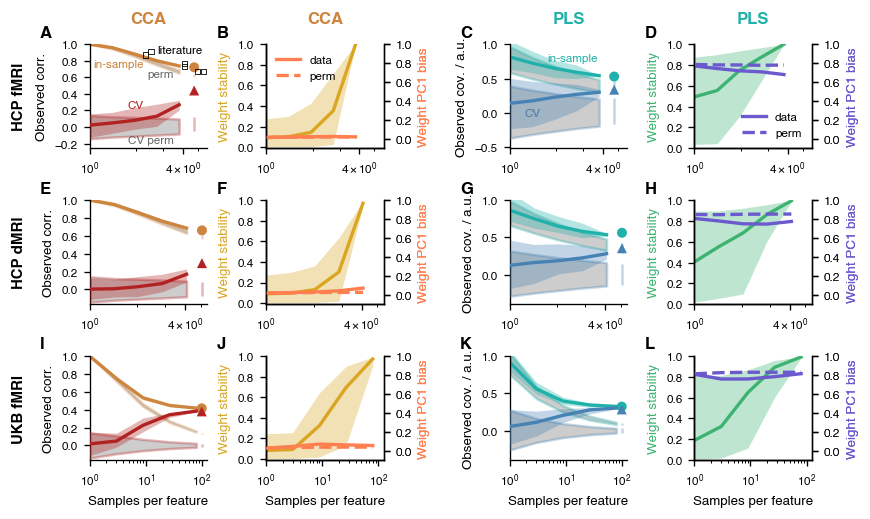

In [13]:
def set_axis_position(plot, element):
    ax = plot.handles['axis']
    bbox = ax.get_position()
    
    if bbox.x0 < .15:
        x0 = .05
    elif bbox.x0 < .35:
        x0 = .26
    elif bbox.x0 < .65:
        x0 = .55
    else:
        x0 = .77
        
    if bbox.y0 < .1:
        y0 = .05
    elif bbox.y0 < .5:
        y0 = .05 + .3
    else:
        y0 = .05 + .6
        
    ax.set_position((x0, y0, .14, .2))
    
    
fig = (
    # --- HCP fMRI ---
    (
        plot_assocs_w_perm(hcp_fMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', 
                           color=clr_cca, color_perm=clr_cca2, pvalue_deltay=.15).opts(opts.Area(show_legend=False))
        * hv.Scatter(literature_markers, label='literature').opts(marker='s', color='None', edgecolor='black', linewidth=.5, s=10)
        * hv.Text(550/200, .925, 'literature', halign='left', valign='center', fontsize=7)
        * hv.Text(210/200, .82, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_cca)
        * hv.Text(700/200, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(450/200, .325, 'CV', fontsize=7, halign='right', valign='top').opts(color=clr_cca2)
        * hv.Text(700/200, -.1, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 5.75), xlabel='', ylim=(None, 1), yticks=7, legend_position='top_left', show_legend=False,
        hooks=[set_axis_position, Sup_ylabel('HCP fMRI'), legend_frame_off, suptitle_cca, 
               Format_log_axis('x', (1, 4))]
    )
    + (
        plot_weight_cossims_n(hcp_fMRI_cca_analyses['subsampled'].sel(mode=0), clr_cca4)
        * plot_pc_bias(hcp_fMRI_cca_analyses['subsampled'], clr_cca3).opts(show_legend=True)
    ).opts(xlim=(1, 5.75), xlabel='', ylim=(-.01, 1), yticks=6, 
           hooks=[set_axis_position, ylabel_clr_cca, legend_frame_off, suptitle_cca, Format_log_axis('x', (1, 4))])
    #
    + (
        plot_assocs_w_perm(hcp_fMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./9000, y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2)
        * hv.Text(350/200, .875, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_pls)
        # * hv.Text(700/200, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(250/200, .075, 'CV', fontsize=7, halign='left', valign='top').opts(color=clr_pls2)
        # * hv.Text(700/200, -.1, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 5.75), xlabel='', ylim=(None, 1.0), ylabel='Observed cov. / a.u.', show_legend=False, legend_position='bottom_left',
        hooks=[set_axis_position, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4))])
    + (
        plot_weight_cossims_n(hcp_fMRI_pls_analyses['subsampled'].sel(mode=0), clr_pls4)
        * plot_pc_bias(hcp_fMRI_pls_analyses['subsampled'], clr_pls3).opts(show_legend=True)
    ).opts(
        xlim=(1, 5.75), xlabel='', yticks=6, ylim=(0, 1), legend_position='bottom_right',
        hooks=[set_axis_position, ylabel_clr_pls, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4))]
    )
    # ----------------
    # --- HCP dMRI ---
    # ----------------
    + plot_assocs_w_perm(hcp_dMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', 
                         color=clr_cca, color_perm=clr_cca2, pvalue_deltay=.1).opts(
        xlim=(1 , 5.5), xlabel='', ylim=(None, 1), yticks=7, show_legend=False,
        hooks=[Sup_ylabel('HCP dMRI'), set_axis_position, Format_log_axis('x', (1, 4)), ]
    )
    + (
        plot_weight_cossims_n(hcp_dMRI_cca_analyses['subsampled'].sel(mode=0), clr_cca4)
        * plot_pc_bias(hcp_dMRI_cca_analyses['subsampled'], clr_cca3).opts(show_legend=True)
    ).opts(
        xlim=(1, 5.5), xlabel='', ylim=(-.01, 1), yticks=6, show_legend=False,
        hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', (1, 4))]
    )
    #
    + plot_assocs_w_perm(hcp_dMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./2000, y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2).opts(
        xlim=(1, 5.5), xlabel='', ylim=(None, 1), ylabel='Observed cov. / a.u.', show_legend=False,
        hooks=[set_axis_position, Format_log_axis('x', (1, 4))]
    )
    + (
        plot_weight_cossims_n(hcp_dMRI_pls_analyses['subsampled'].sel(mode=0), clr_pls4)
        * plot_pc_bias(hcp_dMRI_pls_analyses['subsampled'], clr_pls3).opts(show_legend=True)
    ).opts(
        xlim=(1, 5.5), xlabel='', yticks=6, ylim=(0, 1), show_legend=False,
        hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', (1, 4))]
    )
    # -----------------
    # --- UKB fMRI ---
    # -----------------
    + plot_assocs_w_perm(ukbb_fMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', color=clr_cca, color_perm=clr_cca2).opts(
        xlim=(1, 125), ylim=(None, 1), yticks=7, show_legend=False, 
        hooks=[Sup_ylabel('UKB fMRI'), set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9)]
    )
    + (
        plot_weight_cossims_n(ukbb_fMRI_cca_analyses['subsampled'].sel(mode=0), clr_cca4)
        * plot_pc_bias(ukbb_fMRI_cca_analyses['subsampled'], clr_cca3).opts(show_legend=True)
    ).opts(
        xlim=(1, 125), ylim=(-.01, 1), yticks=6, show_legend=False,
        hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', major_numticks=4, minor_numticks=9)]
    )
    #
    + plot_assocs_w_perm(ukbb_fMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./12000, 
                         y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2).opts(
        xlim=(1, 125), ylim=(None, 1), ylabel='Observed cov. / a.u.', show_legend=False,
        hooks=[set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9)]
    )
    + (
        plot_weight_cossims_n(ukbb_fMRI_pls_analyses['subsampled'].sel(mode=0), clr_pls4)
        * plot_pc_bias(ukbb_fMRI_pls_analyses['subsampled'], clr_pls3).opts(show_legend=True)
    ).opts(
        xlim=(1, 125), yticks=6, ylim=(0, 1), xaxis='bottom', show_legend=False, 
        hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', major_numticks=4, minor_numticks=9)]
    )
).cols(
    4
).opts(*fig_opts).opts(
    opts.Overlay(logx=True, logy=False),
    opts.Layout(fig_inches=(7, 5), sublabel_position=(-.55, .9), vspace=1.25)
)

hv.save(fig, 'fig/fig4_empirical_data_analysis.pdf')

fig

In [18]:
print(hcp_fMRI_cca_analyses['p_value'], hcp_fMRI_pls_analyses['p_value'])
print(hcp_dMRI_cca_analyses['p_value'], hcp_dMRI_pls_analyses['p_value'])
print(ukbb_fMRI_cca_analyses['p_value'], ukbb_fMRI_pls_analyses['p_value'])

0.000999000999000999 0.005994005994005994
0.000999000999000999 0.000999000999000999
0.000999000999000999 0.000999000999000999


:Layout
   .Overlay.I   :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed corr.,yerror)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I       :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed corr.,yerror)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed corr.)
      .Text.I       :Text   [x,y]
      .Text.II      :Text   [x,y]
      .Text.III     :Text   [x,y]
      .Text.IV      :Text   [x,y]
   .Overlay.II  :Overlay
      .Area.I     :Area   [Samples per feature]   (weight_cossim,y2)
      .Curve.I    :Curve   [Samples per feature]   (weight_cossim)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Curve.Perm :Curve   [Samples per feature]   (y)
   .Overlay.III :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Data    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerror)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Area.I       :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerror)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Text.I       :Text   [x,y]
      .Text.II      :Text   [x,y]
   .Overlay.IV  :Overlay
      .Area.I     :Area   [Samples per feature]   (weight_cossim,y2)
      .Curve.I    :Curve   [Samples per feature]   (weight_cossim)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Curve.Perm :Curve   [Samples per feature]   (y)
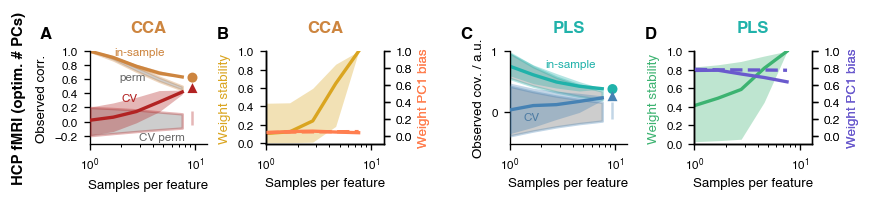

In [14]:
def set_axis_position(plot, element):
    ax = plot.handles['axis']
    bbox = ax.get_position()
    
    if bbox.x0 < .1:
        x0 = .05
    elif bbox.x0 < .35:
        x0 = .26
    elif bbox.x0 < .6:
        x0 = .55
    else:
        x0 = .77
        
    ax.set_position((x0, .25, .14, .35))
    
    
fig_optiNpcs = (
    (
        plot_assocs_w_perm(hcp_fMRI_optiNpcs_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', color=clr_cca, 
                        color_perm=clr_cca2, show_pvalue=False)
        * hv.Text(150/88, .92, 'in-sample', fontsize=7, halign='left', valign='bottom').opts(color=clr_cca)
        * hv.Text(300/88, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(250/88, .265, 'CV', fontsize=7, halign='right', valign='bottom').opts(color=clr_cca2)
        * hv.Text(700/88, -.15, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 1150/88), ylim=(None, 1), yticks=7, show_legend=False, 
        hooks=[suptitle_cca, Sup_ylabel('HCP fMRI (optim. # PCs)'), set_axis_position, Labelpos('x', 4), Format_log_axis('x')]
    )
    + (
        plot_weight_cossims_n(hcp_fMRI_optiNpcs_cca_analyses['subsampled'].sel(mode=0), clr_cca4)
        * plot_pc_bias(hcp_fMRI_optiNpcs_cca_analyses['subsampled'], clr_cca3).opts(show_legend=True)
    ).opts(
        xlim=(1, 1150/88), ylim=(-.01, 1), yticks=6, show_legend=False,
        hooks=[suptitle_cca, set_axis_position, ylabel_clr_cca, Labelpos('x', 3), Format_log_axis('x')]
    )
    #
    + (
        plot_assocs_w_perm(hcp_fMRI_optiNpcs_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./12000, y_label='Observed cov. / a.u.', 
                            color=clr_pls, color_perm=clr_pls2, show_pvalue=False)
        * hv.Text(190/88, .875, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_pls)
        # * hv.Text(700, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(120/88, 0, 'CV', fontsize=7, halign='left', valign='top').opts(color=clr_pls2)
        # * hv.Text(700, -.1, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 1150/88), ylim=(None, 1), ylabel='Observed cov. / a.u.', show_legend=False,
        hooks=[suptitle_pls, set_axis_position, Labelpos('x', 3), Format_log_axis('x')]
    )
    + (
        plot_weight_cossims_n(hcp_fMRI_optiNpcs_pls_analyses['subsampled'].sel(mode=0), clr_pls4)
        * plot_pc_bias(hcp_fMRI_optiNpcs_pls_analyses['subsampled'], clr_pls3).opts(show_legend=True)
    ).opts(
        xlim=(1, 1150/88), show_legend=False, yticks=6, ylim=(0, 1), xaxis='bottom',
        hooks=[suptitle_pls, set_axis_position, ylabel_clr_pls, Labelpos('x', 3), Format_log_axis('x')]
    )
).cols(
    4
).opts(*fig_opts).opts(
    opts.Overlay(logx=True, logy=False),
    opts.Layout(fig_inches=(7, 6), sublabel_position=(-.55, .95), vspace=1.25)
)

hv.save(fig_optiNpcs, 'fig/figS_empirical_data_analysis_hcp_fMRI_optiNpcs.pdf')

fig_optiNpcs

In [15]:
hcp_fMRI_optiNpcs_cca_analyses['p_value'], hcp_fMRI_optiNpcs_pls_analyses['p_value']

(0.000999000999000999, 0.003996003996003996)